In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### 도매업 고객 연간 구매 금액 상품 카테고리 별로 구분한 데이터셋

In [3]:
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'

In [4]:
df = pd.read_csv(uci_path, header=0)
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
df.describe()
# channel은 호텔, 레스토랑, 소매점 판매 채널, region은 지역, Delicassen은 조리된 육류나 치즈, 흔하지 않은 수입 식품 등을 파는 가게, Detergents_Paper는 세제종이

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
# 분석에 사용할 속성을 선택
X = df.iloc[:, :]
print(X[:5])

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [8]:
# 설명 변수 데이터를 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

print(X[:5])

[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


## 차원축소

In [9]:
# PCA
from sklearn.decomposition import PCA

In [10]:
# 2개의 차원으로 변경
pca = PCA(n_components=2)
#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(X)
X_pca = pca.transform(X)
# 변수 축소되었는지 확인
print(X_pca.shape)

(440, 2)


In [20]:
cluster_label

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       3, 1, 1, 1, 0, 0, 1, 3, 0, 0, 0, 3, 0, 1, 3, 1, 1, 3, 3, 0, 1, 1,
       1, 1, 1, 5, 1, 1, 0, 0, 3, 1, 0, 0, 5, 1, 0, 0, 1, 5, 1, 1, 0, 5,
       0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 5, 5, 3,
       0, 0, 0, 0, 5, 3, 1, 0, 1, 0, 0, 0, 1, 1, 1, 3, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 0, 1, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       3, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 3, 1,
       4, 4, 1, 1, 4, 4, 4, 1, 4, 4, 4, 1, 4, 5, 4, 4, 1, 4, 1, 4, 1, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4,
       4, 4, 4, 1, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4,
       1, 4, 1, 4, 1, 4, 4, 4, 4, 3, 0, 0, 3, 0, 0, 1, 0, 1, 3, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 1, 4, 1, 4, 1, 1, 4, 1,

In [22]:
cluster_label = pd.Series(cluster_label)

In [23]:
cluster_label

0      1
1      1
2      1
3      0
4      1
      ..
435    3
436    3
437    1
438    0
439    0
Length: 440, dtype: int32

In [40]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
X_pca2 = pd.DataFrame(X_pca,columns=pca_columns)
X_pca2['target']=cluster_label
# 구매했는지 라벨 분류
X_pca2.head(3)

,pca_component_1,pca_component_2,target
0,0.843939,-0.515351,0
1,1.062676,-0.484601,0
2,1.269141,0.682055,0


In [41]:
X_pca2['target'].unique()

array([0, 1, 3, 4, 2])

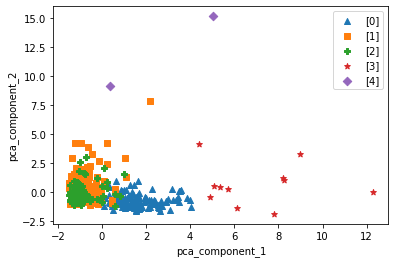

In [44]:
# 2차원으로 PCA 축소한 데이터 시각화
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'P','*','D']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = X_pca2[X_pca2['target']==i]['pca_component_1']
    y_axis_data = X_pca2[X_pca2['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=[i])
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

## k-means 모델링

In [12]:
# sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster
from sklearn.cluster import KMeans

In [36]:
# 모형 객체 생성 
km = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)

In [37]:
# 모형 학습
km.fit(X)

KMeans(n_clusters=5)

## 최적의 클러스터 갯수

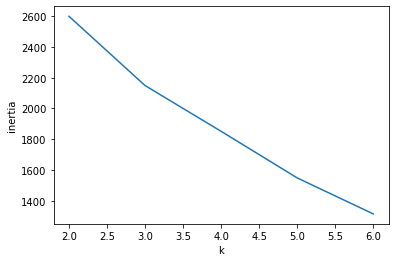

In [35]:
inertia=[]
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 책은 5개, 엘보우 방법으로는 3개가 나옴

In [38]:
# 예측 (군집) 
cluster_label = km.labels_   
print(cluster_label)

[0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 3 0 0 1 1 0 1 1 1 1 1 1 0 1
 0 0 1 1 1 0 0 0 0 0 3 0 0 1 1 0 0 1 1 3 0 1 1 0 3 0 0 1 3 1 0 1 1 1 1 1 0
 0 1 1 0 1 1 1 0 0 1 0 3 3 1 1 1 1 1 3 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 4 1
 1 1 1 0 0 1 1 1 0 1 1 2 0 2 2 0 0 2 2 2 0 2 2 2 0 2 3 2 2 0 2 0 2 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 3 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 0 2 2 2 2 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 2 0
 2 0 0 2 0 0 0 0 0 0 0 2 2 0 2 2 0 2 2 0 2 2 2 0 2 2 2 2 2 4 2 2 2 2 2 0 2
 3 2 0 2 2 2 2 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [39]:
# 예측 결과를 원 데이터셋 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())   
print('\n')

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  
0        1338        0  
1        1776        0  
2        7844        0  
3        1788        1  
4        5185        0  




## 잘 군집되었는지 평가

In [30]:
# 잘 군집되었는지 평가
# Pcax, k=5개일 때 1314점, k=3개 일 때 2149점
km.inertia_

2149.2839562217573

## 시각화

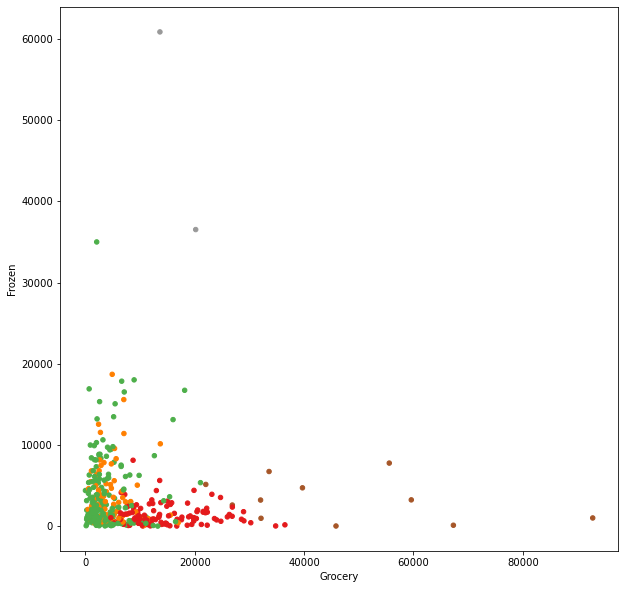

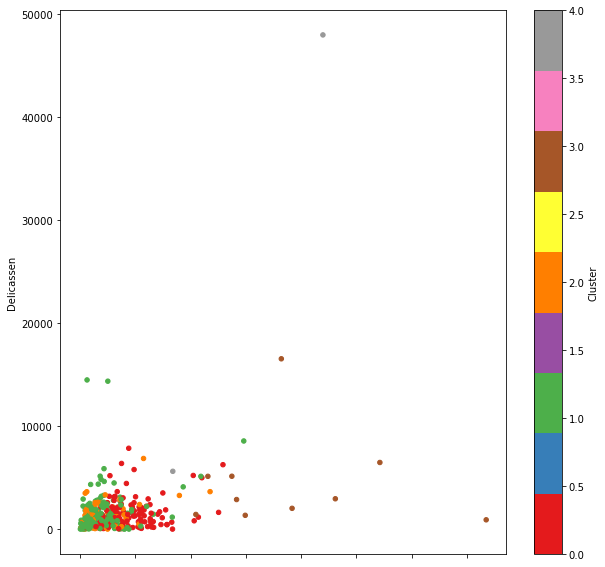

In [45]:
# 그래프로 표현 - 원 데이터에 시각화
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()

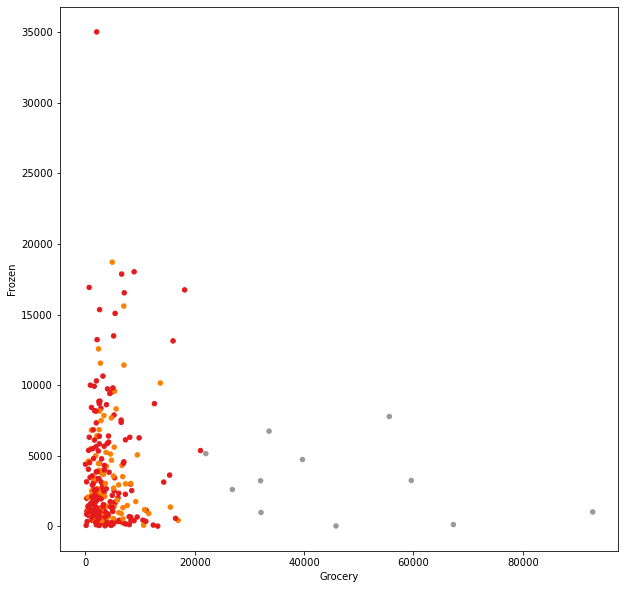

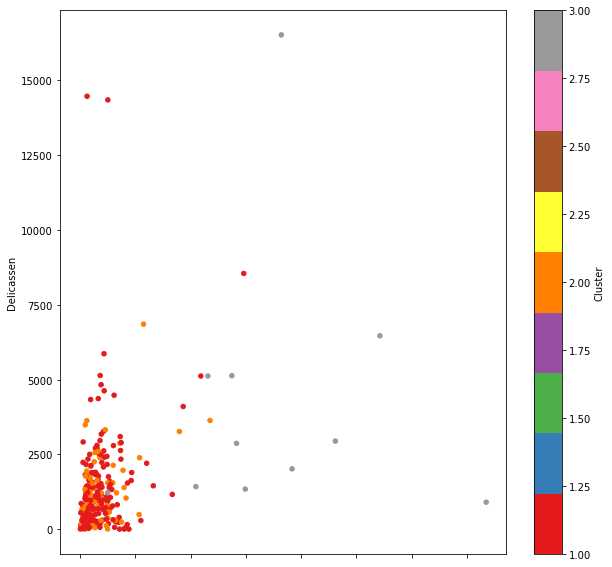

In [46]:
# 큰 값으로 구성된 클러스터(0, 4)를 제외 - 값이 몰려 있는 구간을 자세하게 분석
mask = (df['Cluster'] == 0) | (df['Cluster'] == 4)
ndf = df[~mask]

ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
ndf.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()